In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

# Đọc dữ liệu 

In [72]:
data = pd.read_csv("9000joined.csv")
a = data.dropna()

## Chuẩn hóa lại dữ liệu dạng tiền tệ
- Đầu vào: mảng chứa các chuỗi về tiền
- Đầu ra: mảng chứa các số sau khi chuẩn hóa lại

In [73]:
def parseMoney(beforeParsed):
    afterParsed = []
    for money in beforeParsed:
        #Loại bỏ ký tự '$' và ',' trong xâu rồi chuyển về dạng integer
        afterParsed.append(int(money.strip('$').replace(',',"")))
    return afterParsed

## Xử lý dữ liệu dạng chuỗi gồm nhiều thông tin
Các chuỗi này bao gồm nhiều thông tin nằm chung với nhau ngăn cách bởi dấu phẩy
- Đầu vào: 
    - InputArray: một mảng gồm các chuỗi cần xử lý. Trong project này thì các mảng này là các cột Cast, Genre và Studios
    - Money: mảng số nguyên chứa thông tin về tiền tệ 
    - name: Tên của cột trong bảng dữ liệu mà mình muốn xử lý
- Đầu ra:
    - Một dataFrame chứa thông tin sau khi được tách ra khỏi các chuỗi, số tiền tương ứng và số lượng của chúng

In [74]:
def parseWithMoneyAndCount(InputArray, Money, name):
    result = []
    count = []
    gross = []
    i = 0
    for inputarray in InputArray:
    #Chuyển hóa thành str và loại bỏ dấu ',', inputarray lúc này là một mảng chưa các chuỗi sau khi được split ra từ chuỗi ban đầu
        inputarray = str(inputarray).split(',')
        for x in inputarray:
            #Lưu kết quả vào mảng tương ứng
            result.append(x)
            gross.append(Money[i])
            count.append(1)
        i = i+1
    #Tạo dataFrame
    t = pd.DataFrame({name:result, 'Money':gross, 'Count':count})
    #Loại bỏ các giá trị trùng nhau và cộng các hàng tương ứng lại 
    result = t.groupby(name).sum()
    #Sắp xếp lại dataFrame
    sort_by_money = result.sort_values('Money', ascending = False)
    return sort_by_money

## Xử lý dữ liệu với cột Cast, Genre, Studios, ListOfCertificate
- Tách lấy thông tin cần thiết
- Tính tổng số doanh thu của những bộ phim mà họ từng tham gia

In [75]:
# phần Money trong hàm này cần được chuẩn hóa bằng hàm xử lý tiền tệ trước khi truyền vào
cast = parseWithMoneyAndCount(a['Cast'], parseMoney(a['Gross_worldwide']), 'Cast')
cast

,Money,Count
Cast,,
Samuel L. Jackson,18097217390,69
Robert Downey Jr.,15039939731,46
Scarlett Johansson,14258148970,40
Zoe Saldana,12144395230,25
Dwayne Johnson,11942043248,33
...,...,...
Albert Bassermann,623,1
Joel McCrea,623,1
Celia Lovsky,210,1


Tương tự với cột Genre, Studios và ListOfCertificate

In [76]:
genre = parseWithMoneyAndCount(a['Genre'], parseMoney(a['Gross_worldwide']), 'Genre')
genre

,Money,Count
Genre,,
Adventure,271203912453,1161
Action,257268035537,1535
Drama,199377563689,2984
Comedy,191333750413,2168
Thriller,160628756737,1823
Sci-Fi,145452690013,740
Fantasy,138259562425,754
Family,114324969365,625
Romance,96987409936,1390


In [77]:
studio = parseWithMoneyAndCount(a['Studios'], parseMoney(a['Gross_worldwide']), 'Studio')
studio

,Money,Count
Studio,,
Walt Disney Pictures,66349391865,178
Warner Bros.,62019091303,382
Universal Pictures,56650572201,401
Paramount Pictures,51495436684,348
Columbia Pictures,49959064950,355
...,...,...
Paul Gregory Productions,2001,1
Regal Films,1501,1
Orion-Nova Productions,955,1


In [78]:
certificate = parseWithMoneyAndCount(a['ListOfCertificate'], parseMoney(a['Gross_worldwide']), 'Certificates')
certificate

,Money,Count
Certificates,,
PG-13,264982601985,1786
R,144977990632,2555
PG,122462092033,1015
TV-14,102291704291,711
TV-PG,90327851616,421
TV-G,37743099587,131
G,21826637967,148
TV-MA,20550705456,191
TV-Y7,3761063398,18


## Xử lý dữ liệu cột Keywords, Languages, Countries
Dữ liệu dạng này chủ yếu chỉ cần tách và xem xét đến độ phổ biến nên chỉ cần đếm số lượng

In [79]:
def parseWithCount(InputArray, name):
    result = []
    count = []
    i = 0
    for inputarray in InputArray:
        # Loại bỏ dấu ',' 
        inputarray = str(inputarray).split(',')
        for x in inputarray:
            result.append(x)
            count.append(1)
    result = pd.DataFrame({name:result, 'Count':count})
    #Loại bỏ trùng lặp 
    result = result.groupby(name).sum()
    sort_by_count = result.sort_values('Count', ascending=False)
    return sort_by_count

### Cột keywords

In [80]:
keywords = parseWithCount(a['Keywords'], 'Keywords')
keywords

,Count
Keywords,
female nudity,115
new york city,109
murder,105
female protagonist,101
sex scene,98
...,...
hebrew,1
heavyweight champion,1
heavy water,1


### Cột Languages

In [81]:
languages = parseWithCount(a['Languages'], 'Languages')
languages

,Count
Languages,
English,5374
Spanish,661
French,583
German,319
Italian,274
...,...
Maltese,1
Malayalam,1
Sinhala,1


### Cột Countries

In [82]:
countries = parseWithCount(a['Countries'], 'Countries')
countries

,Count
Countries,
United States,5060
United Kingdom,945
Canada,497
France,428
Germany,409
...,...
Occupied Palestinian Territory,1
Jamaica,1
Kazakhstan,1


## Chuẩn hóa lại dữ liệu dạng thời gian
### 1. Dữ liệu cột runtime dạng giờ-phút
Chuyển toàn bộ về phút

In [83]:
run_time = a['Runtime']
result = []
for time in run_time:
    time = str(time)
    # Loại bỏ khoảng trắng
    time = time.replace(" ", "")
    # nếu trong chuỗi có chứa 'hour' -> có 2 khả năng là chuỗi có chứa 'hours' hoặc 'hour' 
    if "hour" in time:
        hours = 0
        # Nếu chuỗi chứa 'hours', loại bỏ 'hours' và lấy ký tự đầu tiên nhân với 60
        if "hours" in time:
            hours = int(time[0])*60
            after_eliminate_hour = time.replace("hours", "")
        else:
        # Nếu không thì nghĩa là ký tự đầu tiên bằng 1 => 60 phút
            hours = 60
            after_eliminate_hour = time.replace("hour", "")
        minutes = 0
        # Sau đó lấy số phút đó cộng với số phút nếu có đằng sau 
        if "minute" in after_eliminate_hour:
            if "minutes" in after_eliminate_hour:
                minutes = int(after_eliminate_hour.replace("minutes","")[1:])
            else:
                minutes = 1
        result.append(hours+minutes)
    # Nếu chuỗi không chứa 'hour' -> chỉ cần loại bỏ chuỗi 'minutes' rồi chuyển về int là xong
    else:
        result.append(int(time.replace("minutes","")))
        
run_time = pd.DataFrame({'Movie_Title':a['Movie_Title'], 'Time':result})
run_time

,Movie_Title,Time
0,Star Wars: Episode VII - The Force Awakens,138
1,Frozen II,103
2,The Dark Knight Rises,164
3,Beauty and the Beast,129
4,Finding Dory,97
...,...,...
9781,Avengers: Endgame,181
9782,Titanic,194
9783,Avatar,162
9784,Lara Croft: Tomb Raider,100


### 2. Dữ liệu cột release_date dạng ngày tháng năm
Tách ngày, tháng, năm của từng bộ phim

In [84]:
year = []
month = []
date = []
for time in a['Release_Data']:
    year.append(int(str(time)[0:4]))
    month.append(int(str(time)[5:7]))
    date.append(int(str(time)[8:10]))
release_time = pd.DataFrame({'Movie':a['Movie_Title'], 'Date':date, 'Month':month, 'Year':year})
release_time

,Movie,Date,Month,Year
0,Star Wars: Episode VII - The Force Awakens,18,12,2015
1,Frozen II,22,11,2019
2,The Dark Knight Rises,27,7,2012
3,Beauty and the Beast,17,3,2017
4,Finding Dory,17,6,2016
...,...,...,...,...
9781,Avengers: Endgame,26,4,2019
9782,Titanic,18,12,1997
9783,Avatar,18,12,2009
9784,Lara Croft: Tomb Raider,15,6,2001


## Xử lý dữ liệu cột Rating và Rating_Count
- Chuẩn hóa lại dữ liệu cột Rating_Count và chuyển dữ liệu cột Rating về float

In [85]:
rating_count = a['Rating_Count']
result = []
# Đưa dữ liệu cột rating_count về integer
for rate in rating_count:
    rate = str(rate)
    if 'M' in rate:
        result.append(int(float(rate.replace("M", ""))*1000000))
        continue
    elif 'K' in rate:
        result.append(int(float(rate.replace("K", ""))*1000))
        continue
    else:
        result.append(int(rate))
# Đưa dữ liệu cột rating về dạng float
rating = []
for rate in a['Rating']:
    rating.append(float(rate))
rating = pd.DataFrame({'Movie_Title':a['Movie_Title'], 'Rating':rating, 'Count':result})
rating

,Movie_Title,Rating,Count
0,Star Wars: Episode VII - The Force Awakens,7.8,893000
1,Frozen II,6.8,156000
2,The Dark Knight Rises,8.4,1600000
3,Beauty and the Beast,7.1,293000
4,Finding Dory,7.3,259000
...,...,...,...
9781,Avengers: Endgame,8.4,977000
9782,Titanic,7.8,1100000
9783,Avatar,7.8,1200000
9784,Lara Croft: Tomb Raider,5.8,205000


In [86]:
data = pd.read_csv("9000joined.csv")
data

,Movie_Title,Movie_ID,Budget,Cast,Crew,Studios,Genre,Keywords,Languages,Countries,Filming_Location,Release_Data,Runtime,Gross_worldwide,Rating,Rating_Count,ListOfCertificate
0,Star Wars: Episode VII - The Force Awakens,2488496,"$245,000,000","Daisy Ridley,John Boyega,Oscar Isaac,Domhnall ...","Lawrence Kasdan,Michael Arndt,J.J. Abrams","Lucasfilm,Bad Robot,Truenorth Productions","Action,Adventure,Sci-Fi","reboot,sanitation employee,remake,crash landin...",English,United States,"Skellig Michael, County Kerry, Ireland",2015-12-18,2 hours 18 minutes,"$2,069,521,700",7.8,893K,PG-13
1,Frozen II,4520988,"$150,000,000","Kristen Bell,Idina Menzel,Josh Gad,Jonathan Gr...","Jennifer Lee,Hans Christian Andersen,Chris Buck","Walt Disney Animation Studios,Walt Disney Pict...","Animation,Adventure,Comedy,Family,Fantasy,Musical","autumn,anthropomorphic snowman,princess,disney...",English,United States,"Norway, Norge",2019-11-22,1 hour 43 minutes,"$1,450,026,933",6.8,156K,PG
2,The Dark Knight Rises,1345836,"$250,000,000","Christian Bale,Tom Hardy,Anne Hathaway,Gary Ol...","Jonathan Nolan,Christopher Nolan,David S. Goyer","Warner Bros.,Legendary Entertainment,DC Entert...","Action,Crime,Drama","dc comics,batman character,bruce wayne charact...","English,Arabic","United Kingdom,United States","Mehrangarh Fort, Jodhpur, Rajasthan, India",2012-07-27,2 hours 44 minutes,"$1,081,142,612",8.4,1.6M,"PG-13,TV-14"
3,Beauty and the Beast,2771200,"$160,000,000","Emma Watson,Dan Stevens,Luke Evans,Josh Gad,Ke...","Evan Spiliotopoulos,Bill Condon,Stephen Chbosk...","Mandeville Films,Walt Disney Pictures","Adventure,Family,Fantasy,Musical,Romance","beast,fairy tale,heroine,beast's heart,remake ...",English,United States,"Shepperton Studios, Studios Road, Shepperton, ...",2017-03-17,2 hours 9 minutes,"$1,273,576,220",7.1,293K,"PG,TV-PG"
4,Finding Dory,2277860,"$200,000,000","Ellen DeGeneres,Albert Brooks,Ed O'Neill,Kaitl...","Angus MacLane,Victoria Strouse,Andrew Stanton","Pixar Animation Studios,Walt Disney Pictures","Animation,Adventure,Comedy,Family","fish,ocean,whale,octopus driving a truck,talki...","English,Indonesian",United States,"Pixar Animation Studios - 1200 Park Avenue, Em...",2016-06-17,1 hour 37 minutes,"$1,028,570,942",7.3,259K,"TV-G,PG"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9782,Titanic,120338,"$200,000,000","Leonardo DiCaprio,Kate Winslet,Billy Zane,Kath...",James Cameron,"Twentieth Century Fox,Paramount Pictures,Light...","Drama,Romance","iceberg,sailor's death,love affair,sunken ship...","English,Swedish,Italian,French","United States,Mexico,Australia","Titanic wreck, Titanic Canyon, North Atlantic,...",1997-12-18,3 hours 14 minutes,"$2,201,647,264",7.8,1.1M,"PG-13,TV-PG,TV-14"
9783,Avatar,499549,"$237,000,000","Sam Worthington,Zoe Saldana,Sigourney Weaver,M...",James Cameron,"Twentieth Century Fox,Dune Entertainment,Light...","Action,Adventure,Fantasy,Sci-Fi","spiritualism,paraplegic,marine,future,forest p...","English,Spanish",United States,"Hamakua Coast, Hawaii, USA",2009-12-18,2 hours 42 minutes,"$2,847,246,203",7.8,1.2M,"PG-13,TV-14"
9784,Lara Croft: Tomb Raider,146316,"$115,000,000","Angelina Jolie,Jon Voight,Iain Glen,Noah Taylo...","Mike Werb,Sara B. Cooper,Simon West,Michael Co...","Paramount Pictures,Mutual Film Company,BBC Films","Action,Adventure,Fantasy,Thriller","female nudity,handheld weapon,strong female le...","English,Central Khmer,Russian,Italian","United States,United Kingdom,Japan,Germany","Angkor Wat, Siem Reap, Cambodia",2001-06-15,1 hour 40 minutes,"$274,703,340",5.8,205K,PG-13
9785,The Long Walk Home,100046,NaN,"Sissy Spacek,Whoopi Goldberg,Dwight Schultz,Vi...","John Cork,Richard Pearce","Dave Bell Associates,New Visions Pictures","Drama,History","scene during opening credits,alabama,montgomer...",English,United States,"Montgomery, Alabama, USA",1991-04-12,1 hour 37 minutes,"$4,873,620",7.3,3.8K,PG


## Xuất ra file CSV

In [70]:
cast.to_csv("Cast.csv", index = False)
genre.to_csv("Genre.csv", index = False)
studio.to_csv("Studio.csv", index = False)
keywords.to_csv("Keywords.csv", index = False)
languages.to_csv("Languages.csv", index = False)
countries.to_csv("Countries.csv", index = False)
run_time.to_csv("Run_time.csv", index = False)
release_time.to_csv("Release_time.csv", index = False)
rating.to_csv("Rating.csv", index = False)

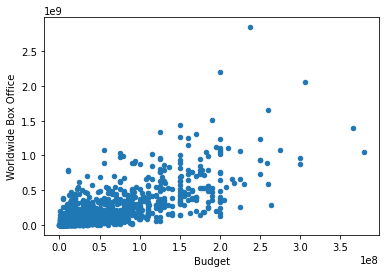

In [10]:
relationship = a["Budget"]
test = {
    'Title': a['Movie_Title'],
    'Budget':parseMoney(a['Budget']),
    'Worldwide Box Office': parseMoney(a['Worldwide Box Office'])
}
test = pd.DataFrame(test)
test.plot(kind="scatter", x = "Budget", y = "Worldwide Box Office")
plt.show()